In [148]:
# Cell 1: Import libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('./data/assistments_dataset.csv')
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (603128, 30)


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,20223588,245748,77759,12914,12914,1,1.0,1,57310.0,tutor,...,0,0,57310,12914,20935.0,NaN,0.0,NaN,1,1
1,20223595,245748,77759,15320,15320,1,1.0,1,88691.0,tutor,...,0,0,88691,15320,22385.0,NaN,0.0,NaN,2,2
2,20223601,245748,77759,14529,14529,1,1.0,1,43748.0,tutor,...,0,0,43748,14529,20735.0,NaN,0.0,NaN,3,3
3,20223926,245698,77912,1159,1159,1,0.0,2,45587.0,tutor,...,0,0,53599,1159,NaN,3,0.0,NaN,1,1
4,20223934,245698,77912,1647,1647,1,1.0,1,90176.0,tutor,...,0,0,90176,1647,3438.0,NaN,0.0,NaN,1,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603128 entries, 0 to 603127
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              603128 non-null  int64  
 1   assignment_id         603128 non-null  int64  
 2   user_id               603128 non-null  int64  
 3   assistment_id         603128 non-null  int64  
 4   problem_id            603128 non-null  int64  
 5   original              603128 non-null  int64  
 6   correct               603128 non-null  float64
 7   attempt_count         603128 non-null  int64  
 8   ms_first_response     603120 non-null  float64
 9   tutor_mode            603128 non-null  object 
 10  answer_type           603128 non-null  object 
 11  sequence_id           603128 non-null  int64  
 12  student_class_id      603128 non-null  int64  
 13  position              603128 non-null  int64  
 14  type                  603128 non-null  object 
 15  

In [151]:
# Cell 2: Check for missing values in all columns
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 order_id                     0
assignment_id                0
user_id                      0
assistment_id                0
problem_id                   0
original                     0
correct                      0
attempt_count                0
ms_first_response            8
tutor_mode                   0
answer_type                  0
sequence_id                  0
student_class_id             0
position                     0
type                         0
base_sequence_id             0
skill_id                     0
skill_name               40860
teacher_id                   0
school_id                    0
hint_count                   0
hint_total                   0
overlap_time                 0
template_id                  0
answer_id               364821
answer_text             324754
first_action                 8
bottom_hint             511268
opportunity                  0
opportunity_original    132846
dtype: int64


Remove samples with null 'skill_name'

In [152]:
df = df[df['skill_name'].notnull()].copy()
print("Shape of df (skill_name not null):", df.shape)
df.head()

Shape of df (skill_name not null): (562268, 30)


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,20223588,245748,77759,12914,12914,1,1.0,1,57310.0,tutor,...,0,0,57310,12914,20935.0,NaN,0.0,NaN,1,1
1,20223595,245748,77759,15320,15320,1,1.0,1,88691.0,tutor,...,0,0,88691,15320,22385.0,NaN,0.0,NaN,2,2
2,20223601,245748,77759,14529,14529,1,1.0,1,43748.0,tutor,...,0,0,43748,14529,20735.0,NaN,0.0,NaN,3,3
6,20223948,245698,77912,2186,2186,1,1.0,1,95637.0,tutor,...,0,0,95637,2186,NaN,4,0.0,NaN,1,1
7,20223955,245698,77912,1653,1653,1,1.0,1,227226.0,tutor,...,0,0,227226,1653,3493.0,NaN,0.0,NaN,2,2


EDA On Correct/Incorrect Answers

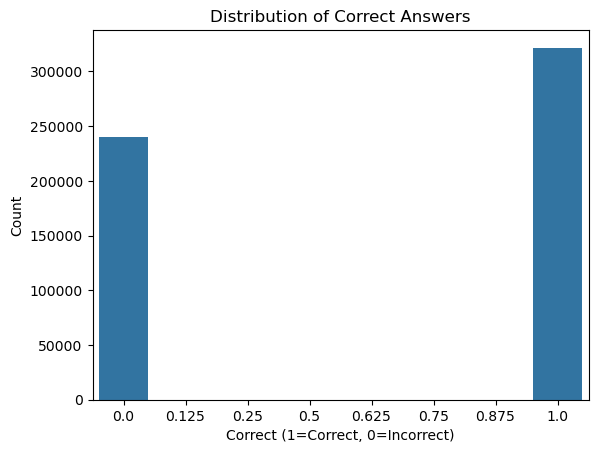

correct
1.000    0.572158
0.000    0.427538
0.250    0.000108
0.500    0.000096
0.750    0.000092
0.875    0.000004
0.625    0.000002
0.125    0.000002
Name: proportion, dtype: float64


In [35]:
# Cell 3: EDA on 'correct' (distribution of correct/incorrect answers)
sns.countplot(x='correct', data=df)
plt.title('Distribution of Correct Answers')
plt.xlabel('Correct (1=Correct, 0=Incorrect)')
plt.ylabel('Count')
plt.show()
print(df['correct'].value_counts(normalize=True))

EDA on Time Taken on Questions

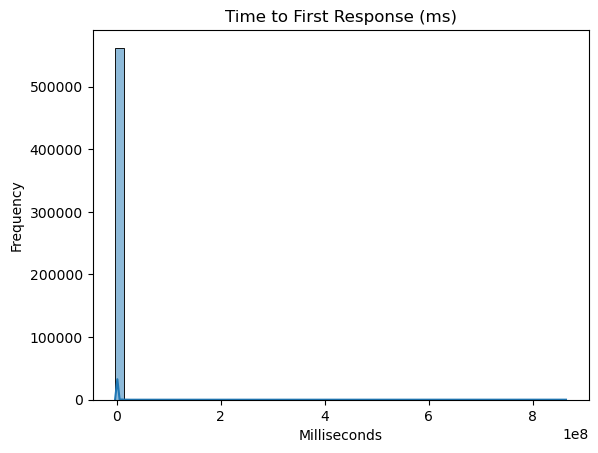

count    5.622600e+05
mean     5.891408e+04
std      1.700895e+06
min     -3.417476e+06
25%      8.547000e+03
50%      2.081200e+04
75%      4.869300e+04
max      8.643416e+08
Name: ms_first_response, dtype: float64


In [36]:
sns.histplot(df['ms_first_response'].dropna(), bins=50, kde=True)
plt.title('Time to First Response (ms)')
plt.xlabel('Milliseconds')
plt.ylabel('Frequency')
plt.show()
print(df['ms_first_response'].describe())

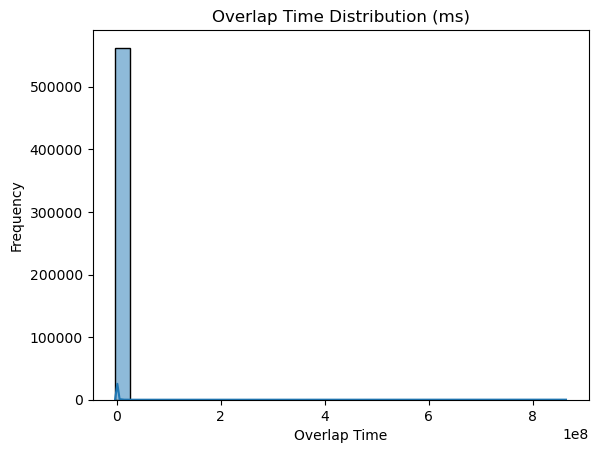

count    5.622680e+05
mean     6.823897e+04
std      1.728428e+06
min     -3.066430e+06
25%      1.068900e+04
50%      2.468700e+04
75%      5.710700e+04
max      8.643417e+08
Name: overlap_time, dtype: float64


In [36]:
sns.histplot(df['overlap_time'].dropna(), bins=30, kde=True)
plt.title('Overlap Time Distribution (ms)')
plt.xlabel('Overlap Time')
plt.ylabel('Frequency')
plt.show()
print(df['overlap_time'].describe())

EDA on Question Types and Skills

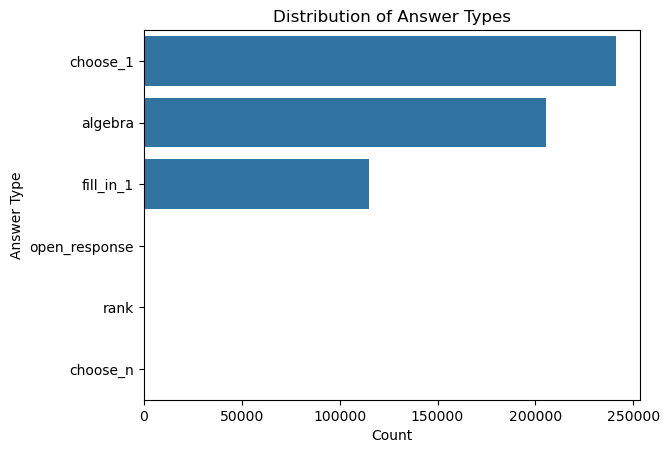

answer_type
choose_1         241195
algebra          205414
fill_in_1        114876
open_response       586
rank                164
choose_n             33
Name: count, dtype: int64


In [37]:
sns.countplot(y='answer_type', data=df, order=df['answer_type'].value_counts().index)
plt.title('Distribution of Answer Types')
plt.xlabel('Count')
plt.ylabel('Answer Type')
plt.show()
print(df['answer_type'].value_counts())

Number of unique skills: 525


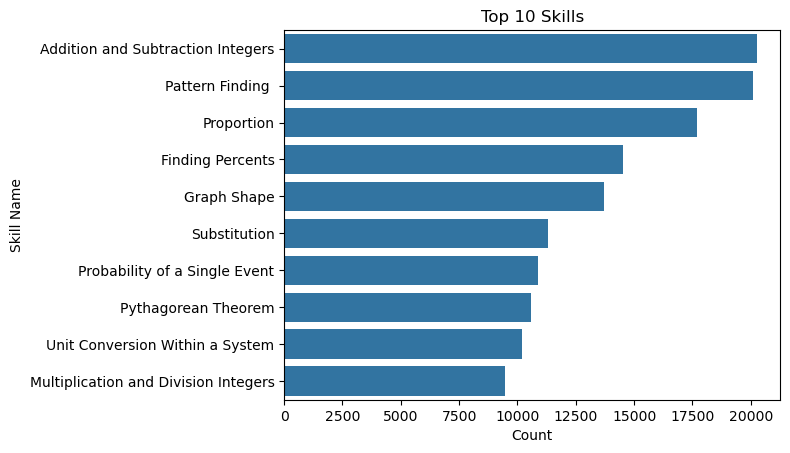

In [7]:
print("Number of unique skills:", df['skill_id'].nunique())
top_skills = df['skill_name'].value_counts().head(10)
sns.barplot(y=top_skills.index, x=top_skills.values)
plt.title('Top 10 Skills')
plt.xlabel('Count')
plt.ylabel('Skill Name')
plt.show()

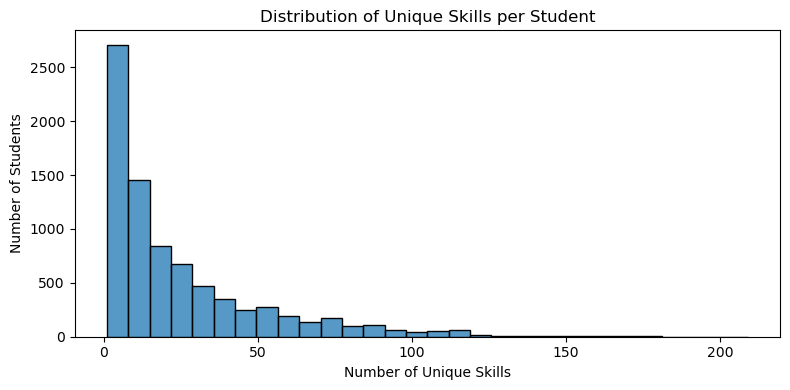

In [ ]:
# Number of unique skills each student encounters
student_skill_counts = df.groupby('user_id')['skill_name'].nunique()
plt.figure(figsize=(8,4))
sns.histplot(student_skill_counts, bins=30, kde=False)
plt.title('Distribution of Unique Skills per Student')
plt.xlabel('Number of Unique Skills')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

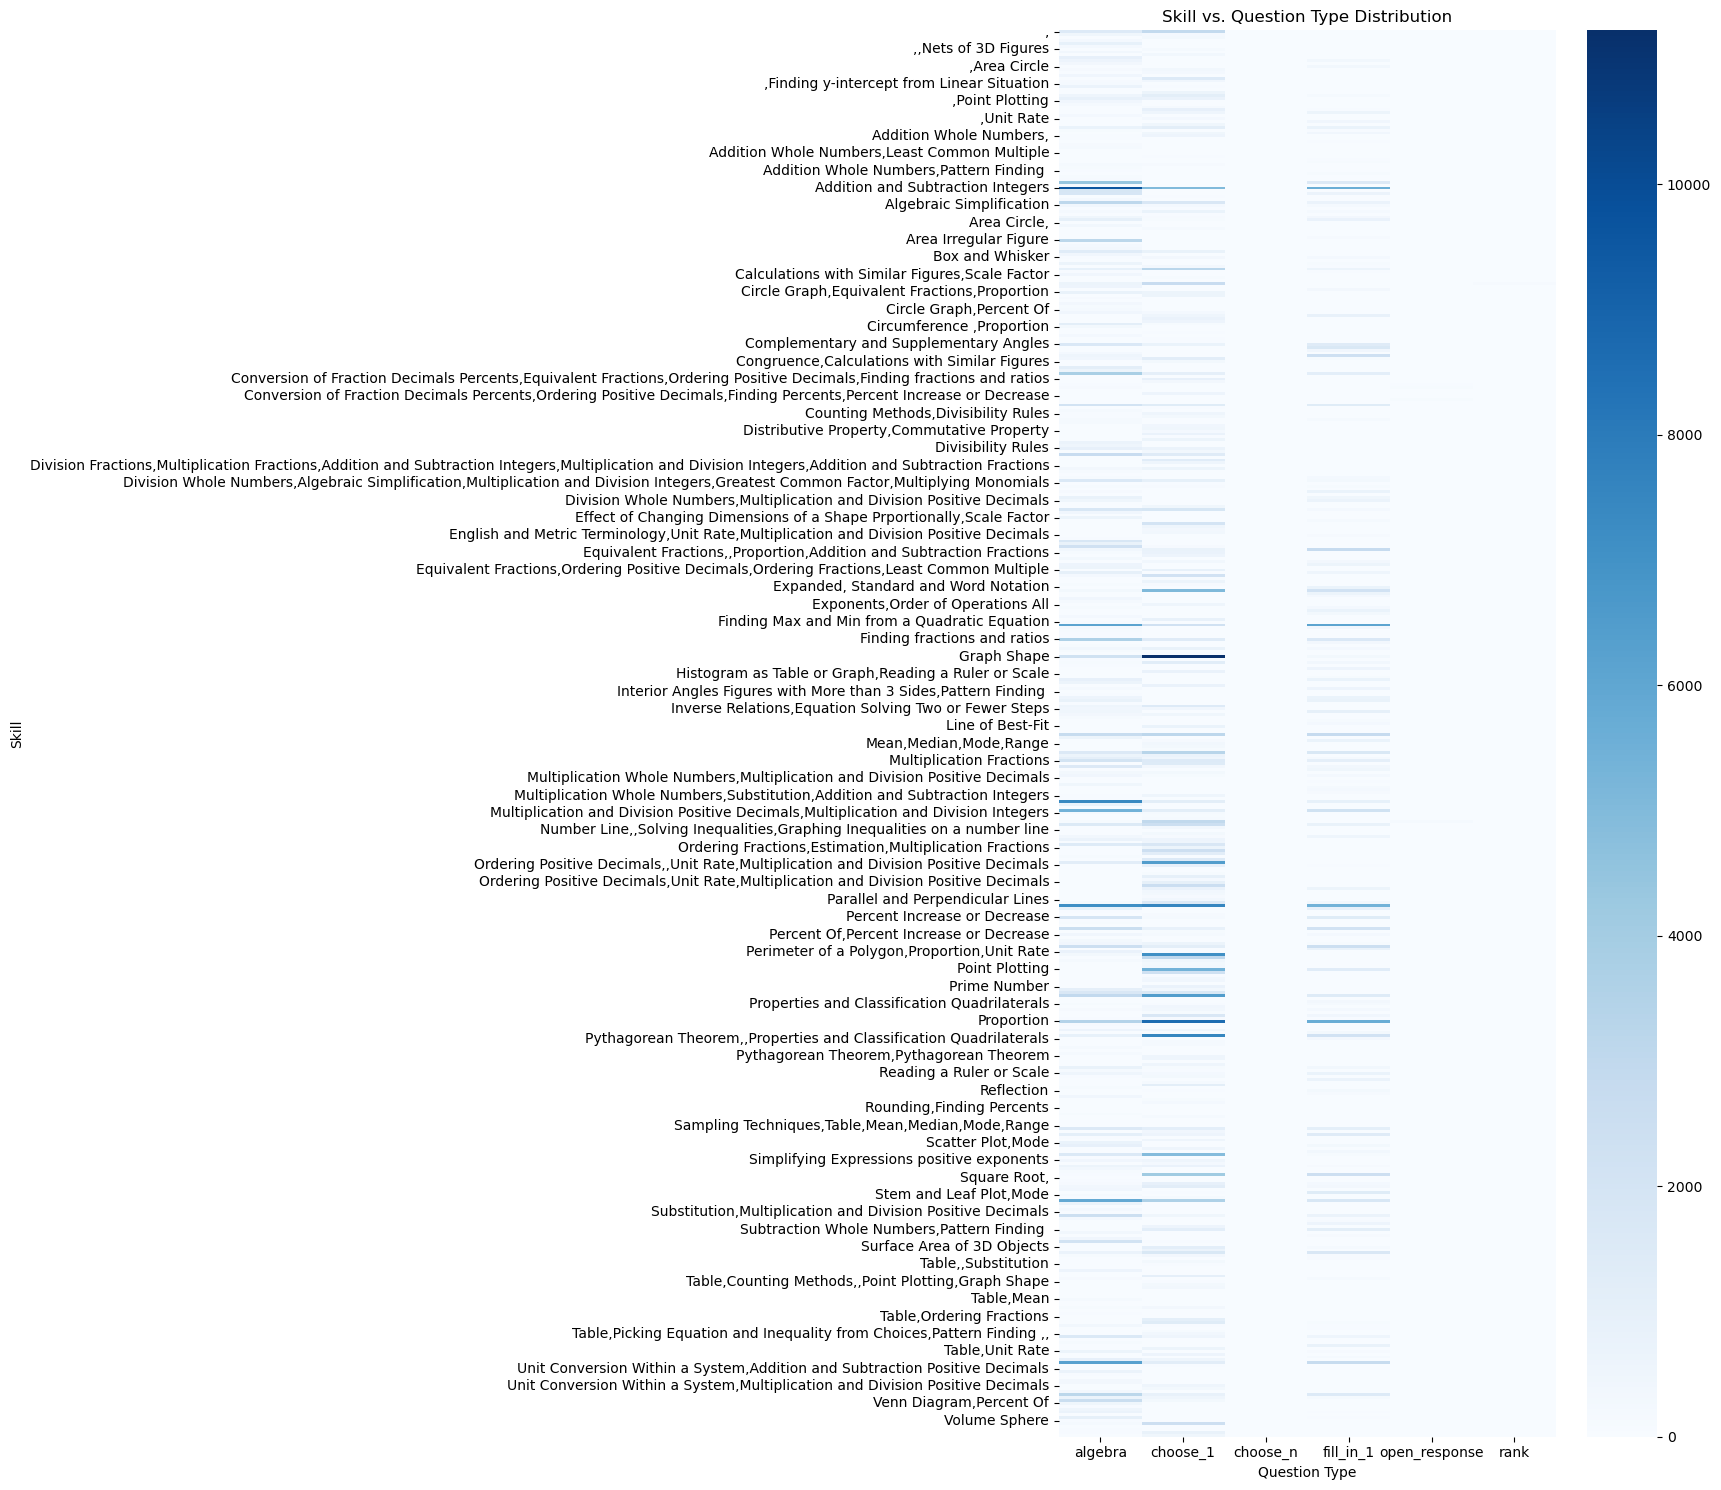

In [24]:
# Count of each skill-question type pair
skill_qtype = df.groupby(['skill_name', 'answer_type']).size().unstack(fill_value=0)
plt.figure(figsize=(17, min(5*len(skill_qtype), 15)))
sns.heatmap(skill_qtype, cmap='Blues')
plt.title('Skill vs. Question Type Distribution')
plt.xlabel('Question Type')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


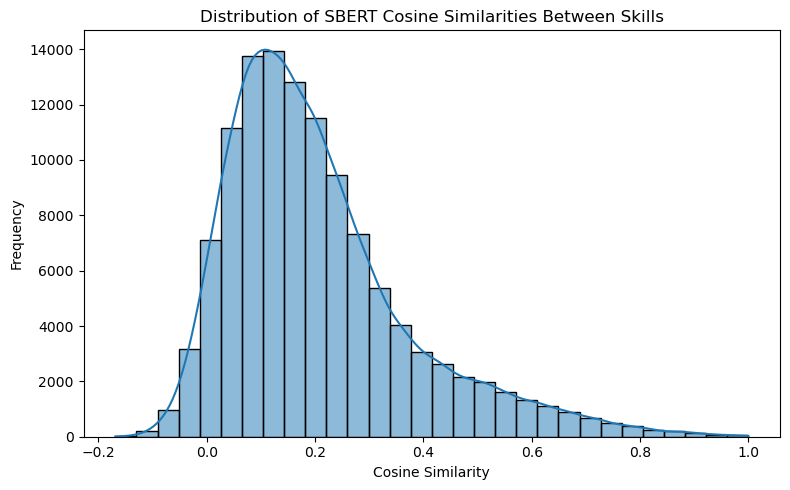

In [10]:
%pip install sentence_transformers

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get unique skills
unique_skills = df['skill_name'].unique()

# Compute SBERT embeddings
sbert = SentenceTransformer('all-MiniLM-L6-v2')
skill_embs = sbert.encode(unique_skills)

# Compute pairwise cosine similarities (excluding self-similarity)
sim_matrix = cosine_similarity(skill_embs)
upper_tri_indices = np.triu_indices_from(sim_matrix, k=1)
similarities = sim_matrix[upper_tri_indices]

plt.figure(figsize=(8, 5))
sns.histplot(similarities, bins=30, kde=True)
plt.title('Distribution of SBERT Cosine Similarities Between Skills')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

EDA on Hints Usage

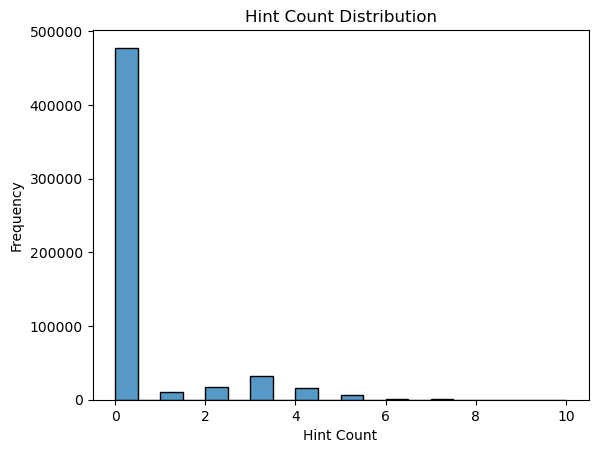

count    562268.000000
mean          0.439141
std           1.139588
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: hint_count, dtype: float64


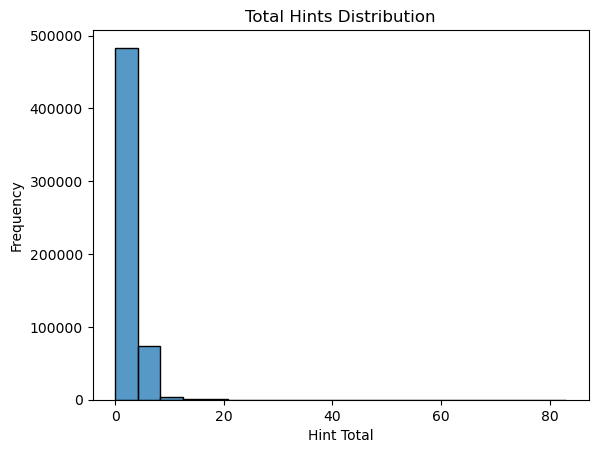

count    562268.000000
mean          2.332279
std           2.403852
min           0.000000
25%           0.000000
50%           3.000000
75%           4.000000
max          83.000000
Name: hint_total, dtype: float64


In [39]:
sns.histplot(df['hint_count'].dropna(), bins=20, kde=False)
plt.title('Hint Count Distribution')
plt.xlabel('Hint Count')
plt.ylabel('Frequency')
plt.show()
print(df['hint_count'].describe())

sns.histplot(df['hint_total'].dropna(), bins=20, kde=False)
plt.title('Total Hints Distribution')
plt.xlabel('Hint Total')
plt.ylabel('Frequency')
plt.show()
print(df['hint_total'].describe())

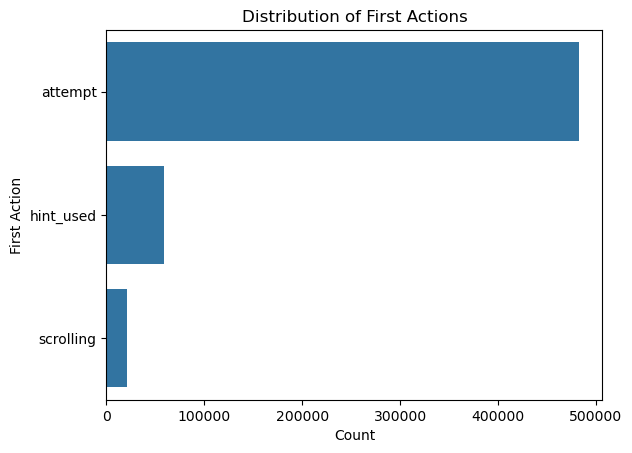

first_action
attempt      482446
hint_used     58953
scrolling     20861
Name: count, dtype: int64


In [40]:
action_labels = {0: 'attempt', 1: 'hint_used', 2: 'scrolling'}
df['first_action_label'] = df['first_action'].map(action_labels)

sns.countplot(y='first_action_label', data=df, order=['attempt', 'hint_used', 'scrolling'])
plt.title('Distribution of First Actions')
plt.xlabel('Count')
plt.ylabel('First Action')
plt.show()
print(df['first_action'].value_counts().rename(index=action_labels))

EDA on Attempt Count

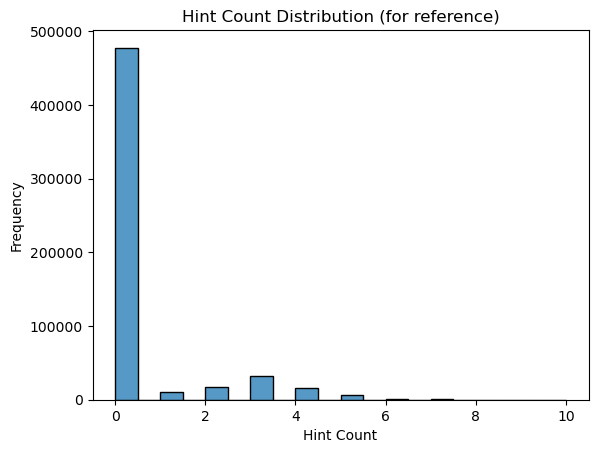

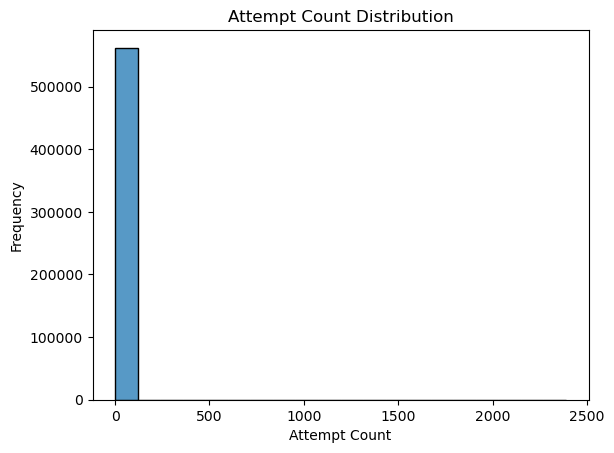

count    562268.000000
mean          1.413596
std           5.797758
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        2388.000000
Name: attempt_count, dtype: float64


In [41]:
# EDA on 'attempt_count' column in df
sns.histplot(df['hint_count'].dropna(), bins=20, kde=False)
plt.title('Hint Count Distribution (for reference)')
plt.xlabel('Hint Count')
plt.ylabel('Frequency')
plt.show()

if 'attempt_count' in df.columns:
    sns.histplot(df['attempt_count'].dropna(), bins=20, kde=False)
    plt.title('Attempt Count Distribution')
    plt.xlabel('Attempt Count')
    plt.ylabel('Frequency')
    plt.show()
    print(df['attempt_count'].describe())
else:
    print("'attempt_count' column is not present in df. Checking in df...")
    if 'attempt_count' in df.columns:
        sns.histplot(df['attempt_count'].dropna(), bins=20, kde=False)
        plt.title('Attempt Count Distribution')
        plt.xlabel('Attempt Count')
        plt.ylabel('Frequency')
        plt.show()
        print(df['attempt_count'].describe())
    else:
        print("'attempt_count' column not found in either df or df.")

In [42]:
df[['skill_name', 'skill_id']].tail(10)

,skill_name,skill_id
603118,Substitution,95
603119,Proportion,212
603120,Percents,204
603121,Volume of 3D Objects,238
603122,",Area Circle","30,39"
603123,Addition and Subtraction Fractions,280
603124,Addition and Subtraction Positive Decimals,278
603125,Division Fractions,61
603126,Multiplication and Division Positive Decimals,276
603127,Multiplication Fractions,67


In [43]:
# Split skill_id by comma, explode, and count (user_id, skill_id) pairs
pairs = df.assign(skill_id=df['skill_name'].str.split(',')).explode('skill_id')
pairs['skill_id'] = pairs['skill_id'].str.strip()
pair_counts = pairs.groupby(['user_id', 'skill_id']).size().reset_index(name='count')
pair_counts = pair_counts.sort_values('count', ascending=False)
pair_counts.tail(1000)

,user_id,skill_id,count
86857,82508,Write Linear Equation from Situation,1
86854,82508,Volume Cylinder,1
86851,82508,Table,1
86849,82508,Surface Area Cylinder,1
86909,82509,Subtraction Whole Numbers,1
...,...,...,...
85942,82491,Congruence,1
85939,82491,Circle Graph,1
85937,82491,Area Triangle,1
85935,82491,Area Rectangle,1


Data Cleaning with important features

In [153]:
# Remove rows where 'skill_name' is only ',' or empty/whitespace
cleaned_df = df[
    (df['skill_name'].notnull()) &
    (df['skill_name'].str.strip() != ',') &
    (df['skill_name'].str.strip() != '')
][[
    'user_id', 'order_id', 'correct', 'answer_type', 'attempt_count',
    'sequence_id', 'skill_name', 'hint_count', 'overlap_time'
]].copy()
print("Shape of cleaned_df:", cleaned_df.shape)
cleaned_df.head(10)

Shape of cleaned_df: (557878, 9)


,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time
0,77759,20223588,1.0,choose_1,1,5366,Symbolization,0,57310
1,77759,20223595,1.0,choose_1,1,5366,Symbolization,0,88691
2,77759,20223601,1.0,choose_1,1,5366,Symbolization,0,43748
6,77912,20223948,1.0,algebra,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,95637
7,77912,20223955,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,227226
8,77912,20223963,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,165891
9,77912,20223971,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,129112
11,77912,20223984,1.0,choose_1,1,2655,"Addition Whole Numbers,",0,87127
13,77912,20224018,1.0,choose_1,1,2654,"Number Line,",0,179111
15,77912,20224039,1.0,algebra,1,2654,"Multiplication Whole Numbers,Pattern Finding ,",0,30964


In [154]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557878 entries, 0 to 603127
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        557878 non-null  int64  
 1   order_id       557878 non-null  int64  
 2   correct        557878 non-null  float64
 3   answer_type    557878 non-null  object 
 4   attempt_count  557878 non-null  int64  
 5   sequence_id    557878 non-null  int64  
 6   skill_name     557878 non-null  object 
 7   hint_count     557878 non-null  int64  
 8   overlap_time   557878 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 42.6+ MB


In [138]:
cleaned_df['hint_count'].value_counts()

hint_count
0     474075
3      32713
2      16573
4      16013
1      11032
5       6174
6        927
7        340
8         29
10         1
9          1
Name: count, dtype: int64

In [139]:
# Remove rows where 'hint_count' is 8, 9, or 10 (outliers)
cleaned_df = cleaned_df[~cleaned_df['hint_count'].isin([8, 9, 10])]
print("Shape of cleaned_df after removing hint_count outliers:", cleaned_df.shape)
cleaned_df['hint_count'].value_counts()

Shape of cleaned_df after removing hint_count outliers: (557847, 9)


hint_count
0    474075
3     32713
2     16573
4     16013
1     11032
5      6174
6       927
7       340
Name: count, dtype: int64

In [140]:
cleaned_df['answer_type'].value_counts()

answer_type
choose_1         238288
algebra          203906
fill_in_1        114870
open_response       586
rank                164
choose_n             33
Name: count, dtype: int64

In [155]:
# Remove rows where answer_type is 'open_response', 'rank', or 'choose_n'
cleaned_df = cleaned_df[~cleaned_df['answer_type'].isin(['open_response', 'rank', 'choose_n'])]
print("Shape of cleaned_df after removing specified answer_types:", cleaned_df.shape)
cleaned_df['answer_type'].value_counts()

Shape of cleaned_df after removing specified answer_types: (557095, 9)


answer_type
choose_1     238288
algebra      203931
fill_in_1    114876
Name: count, dtype: int64

In [156]:
# Arrange the DataFrame by order_id from lowest to highest
cleaned_df = cleaned_df.sort_values(by='order_id', ascending=True).reset_index(drop=True)
print("DataFrame sorted by order_id (ascending):")
cleaned_df.tail(30)

DataFrame sorted by order_id (ascending):


,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time
557065,96282,38309727,1.0,algebra,1,6082,Pattern Finding,0,11349
557066,96282,38309728,1.0,fill_in_1,1,6082,Exponents,0,3830
557067,96282,38309729,1.0,choose_1,1,6082,Exponents,0,6022
557068,96282,38309776,1.0,choose_1,1,7456,Picking Equation and Inequality from Choices,0,16167
557069,96282,38309778,1.0,fill_in_1,1,7456,Pattern Finding,0,33287
557070,96282,38309825,1.0,algebra,1,9195,Probability of Two Distinct Events,0,30907
557071,96282,38309828,1.0,algebra,1,9195,Probability of a Single Event,0,14496
557072,96282,38309892,0.0,choose_1,2,9540,Pythagorean Theorem,0,60585
557073,96282,38309893,1.0,choose_1,1,9540,Point Plotting,0,50483
557074,96282,38309894,1.0,choose_1,1,9540,Point Plotting,0,52808


In [157]:
def clean_skill_list(skill_str):
    if pd.isnull(skill_str):
        return []
    return [s.strip() for s in skill_str.split(',') if s.strip() != '']

cleaned_df['skill_name_split'] = cleaned_df['skill_name'].apply(clean_skill_list)

In [158]:
# Show all unique skill names that are ',,' 
cleaned_df[cleaned_df['skill_name'].str.lower() == ',,']

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time,skill_name_split
11,77912,20224177,1.0,choose_1,1,2653,",,",0,599816,[]
54565,33121,22733450,1.0,choose_1,1,2653,",,",0,10943,[]
73713,79852,23443315,1.0,choose_1,1,2,",,",0,29408,[]
80438,82906,23607210,1.0,choose_1,1,2,",,",0,16750,[]
80510,82907,23608952,1.0,choose_1,1,2,",,",0,26378,[]
...,...,...,...,...,...,...,...,...,...,...
555717,96289,38299352,0.0,algebra,4,6084,",,",0,79204,[]
556447,96225,38306179,1.0,algebra,1,6079,",,",0,5223,[]
556490,96225,38306327,1.0,algebra,1,6084,",,",0,49177,[]
556874,96282,38308898,1.0,algebra,1,6079,",,",0,4362,[]


In [159]:
# Drop rows where 'skill_name' is ',,'
cleaned_df = cleaned_df[cleaned_df['skill_name'].str.strip().str.lower() != ',,']

In [160]:
# Explode skill_name so each skill is counted separately
skills_exploded = cleaned_df.copy()
# If not already split, split skill_name into a list
if skills_exploded['skill_name_split'].apply(lambda x: isinstance(x, list)).all():
    pass  # already split
else:
    skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].apply(
        lambda x: [s.strip() for s in str(x).split(',')] if pd.notnull(x) else []
    )
skills_exploded = skills_exploded.explode('skill_name_split')
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].astype(str).str.strip()
skills_exploded = skills_exploded[skills_exploded['skill_name_split'] != '']

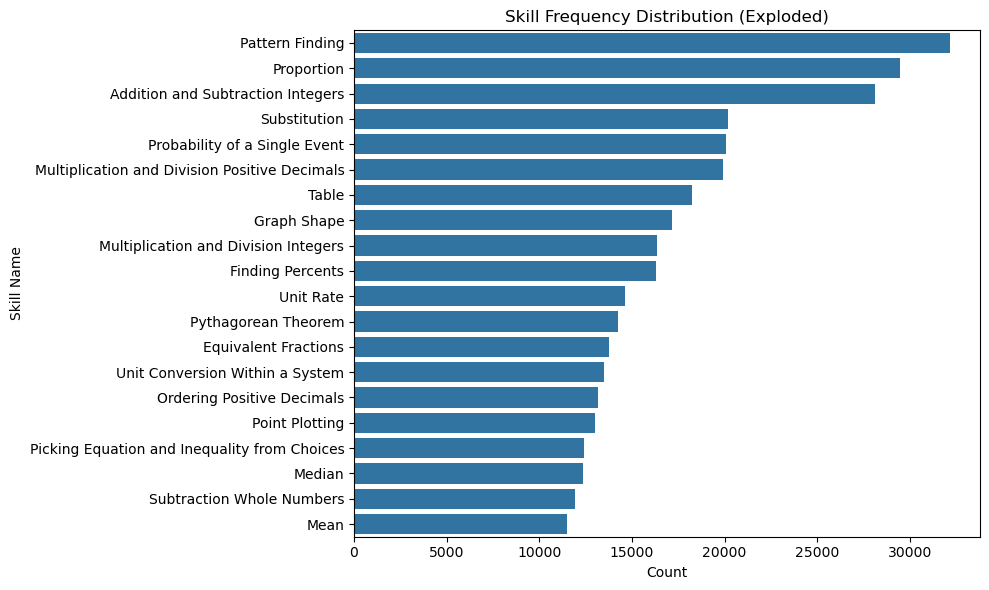

In [77]:
# Plot skill frequency
skill_counts = skills_exploded['skill_name_split'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=skill_counts.index[:20], x=skill_counts.values[:20])  # Top 20 for readability
plt.title('Skill Frequency Distribution (Exploded)')
plt.xlabel('Count')
plt.ylabel('Skill Name')
plt.tight_layout()
plt.show()

C:\Users\okafo\AppData\Local\Temp\ipykernel_25728\828111444.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


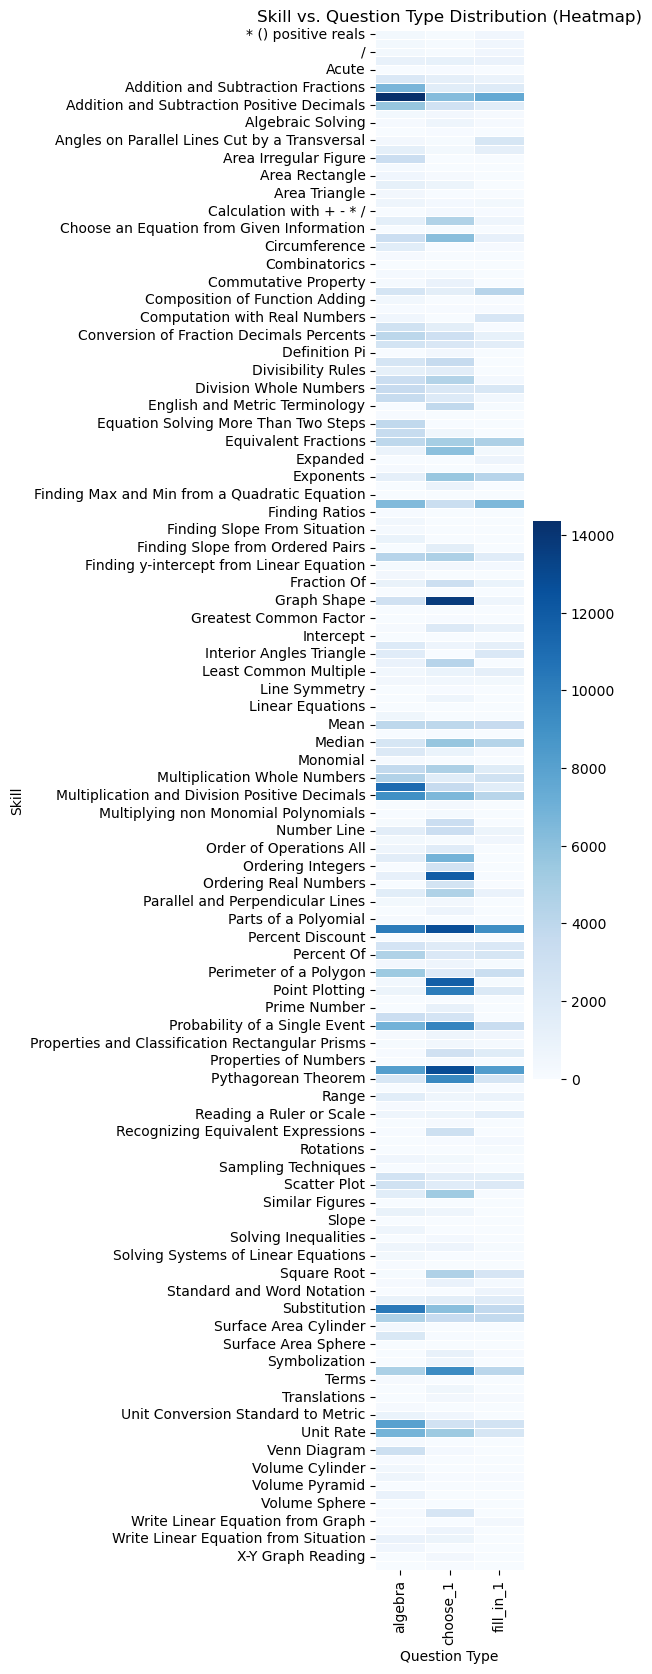

In [91]:
# Create a pivot table: rows=skills, columns=answer types, values=counts
skill_answer_heatmap = skills_exploded.pivot_table(
    index='skill_name_split',
    columns='answer_type',
    aggfunc='size',
    fill_value=0
)

plt.figure(figsize=(min(0.8 * len(skill_answer_heatmap.columns), 12), min(0.3 * len(skill_answer_heatmap), 20)))
sns.heatmap(skill_answer_heatmap, cmap='Blues', linewidths=0.5)
plt.title('Skill vs. Question Type Distribution (Heatmap)')
plt.xlabel('Question Type')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

Typo fix from manual oversight

In [161]:
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].replace(
    'D.4.8-understanding-concept-of-probabilities', 'Understanding Concept of Probabilities'
)
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].replace(
    'Effect of Changing Dimensions of a Shape Prportionally', 'Effect of Changing Dimensions of a Shape Proportionally'
)
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].replace(
    'Order of Operations +', 'Order of Operations'
)
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].replace(
    'Writine Expression from Diagrams', 'Writing Expression from Diagrams'
)


In [124]:
# Show samples with skill 'and Right'
samples_and_right = skills_exploded[skills_exploded['skill_name_split'] == 'and Right']
print(samples_and_right)

        user_id  order_id  correct answer_type  attempt_count  sequence_id  \
261656    78390  30208914      1.0    choose_1              1         9128   
261663    80149  30209037      0.0    choose_1              1         9128   
261675    78394  30209236      1.0    choose_1              1         9128   
261691    78407  30209454      1.0    choose_1              1         9128   
261693    78388  30209470      1.0    choose_1              1         9128   
...         ...       ...      ...         ...            ...          ...   
379041    78390  33425460      1.0    choose_1              1         9128   
380960    78398  33460420      1.0    choose_1              1         9128   
380993    78408  33460728      1.0    choose_1              1         9128   
381235    78401  33463713      1.0    choose_1              1         9128   
395342    77725  33775155      1.0    choose_1              1         9128   

                               skill_name  hint_count  overlap_

In [162]:
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].replace(
    'and Right', 'Angles - Right'
)
skills_exploded['skill_name_split'] = skills_exploded['skill_name_split'].replace(
    'Acute', 'Angles - Acute'
)

In [126]:
print(skills_exploded['skill_name_split'].unique())

['Symbolization' 'Effect of Changing Dimensions of a Shape Proportionally'
 'Addition Whole Numbers' 'Number Line' 'Multiplication Whole Numbers'
 'Pattern Finding' 'Finding Slope from Graph' 'Point Plotting'
 'Graph Shape' 'Scatter Plot' 'Ordering Whole Numbers' 'Algebraic Solving'
 'Substitution' 'Congruence' 'Perimeter of a Polygon'
 'Equation Solving More Than Two Steps'
 'Properties and Classification Triangles' 'Solving System of Equation'
 'Venn Diagram' 'Percent Of' 'Factoring Trinomials'
 'Finding y-intercept from Linear Equation'
 'Parallel and Perpendicular Slopes'
 'Picking Equation and Inequality from Choices'
 'Finding Slope From Equation' 'Write Linear Equation from Graph'
 'Interior Angles Triangle' 'Complementary and Supplementary Angles'
 'Pythagorean Theorem' 'Calculations with Similar Figures'
 'Absolute Value' 'Quadratic Equation Solving' 'Ordering Fractions'
 'Fraction Of' 'Square Root' 'Proportion' 'Exponents'
 'Multiplication and Division Positive Decimals'
 'Mu

In [127]:
import json

# Sort the skills alphabetically
sorted_skills = sorted(skills_exploded['skill_name_split'].unique())

# Save to JSON file
with open('sorted_skills.json', 'w') as f:
    json.dump(sorted_skills, f, indent=2)

print("Sorted skills saved to sorted_skills.json")

Sorted skills saved to sorted_skills.json


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


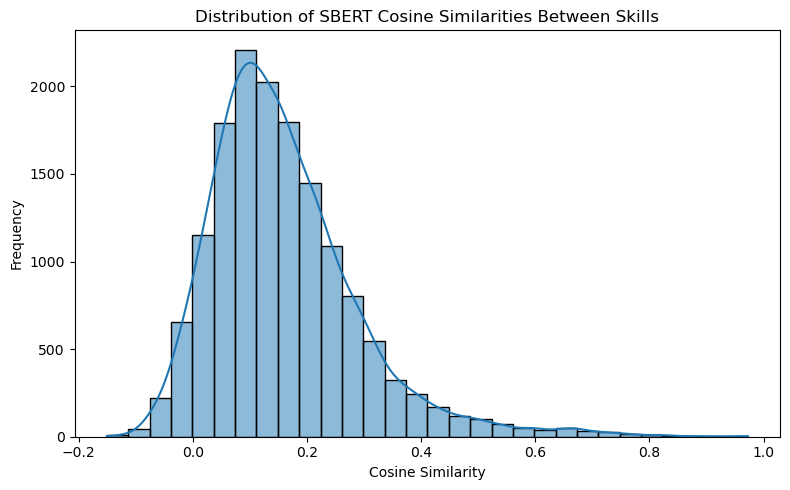

In [92]:
%pip install sentence_transformers

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get unique skills
unique_skills = skills_exploded['skill_name_split'].unique()

# Compute SBERT embeddings
sbert = SentenceTransformer('all-MiniLM-L6-v2')
skill_embs = sbert.encode(unique_skills)

# Compute pairwise cosine similarities (excluding self-similarity)
sim_matrix = cosine_similarity(skill_embs)
upper_tri_indices = np.triu_indices_from(sim_matrix, k=1)
similarities = sim_matrix[upper_tri_indices]

plt.figure(figsize=(8, 5))
sns.histplot(similarities, bins=30, kde=True)
plt.title('Distribution of SBERT Cosine Similarities Between Skills')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Determining Sequence

In [93]:
# Print full value counts for sequence_id and order_id
print("Value counts for sequence_id:")
print(cleaned_df['sequence_id'].value_counts())

print("\nValue counts for order_id:")
print(cleaned_df['order_id'].value_counts())

print("\nValue counts for user_id:")
print(cleaned_df['user_id'].value_counts())


Value counts for sequence_id:
sequence_id
2845     13076
11069    12640
3        10958
2854     10877
2635     10794
         ...  
10329        1
5388         1
5390         1
5382         1
10776        1
Name: count, Length: 739, dtype: int64

Value counts for order_id:
order_id
20223588    1
33269032    1
33269337    1
33269285    1
33269274    1
           ..
27627969    1
27627966    1
27627944    1
27627922    1
38310112    1
Name: count, Length: 556388, dtype: int64

Value counts for user_id:
user_id
85828    1036
88682     890
91132     761
88524     738
78917     731
         ... 
84709       1
88374       1
89415       1
91249       1
77296       1
Name: count, Length: 8023, dtype: int64


In [94]:
import numpy as np

user_counts = cleaned_df['user_id'].value_counts()
print(user_counts.describe()) 
print(np.percentile(user_counts, 90))

count    8023.000000
mean       69.349121
std       100.824432
min         1.000000
25%        11.000000
50%        30.000000
75%        78.000000
max      1036.000000
Name: count, dtype: float64
194.0


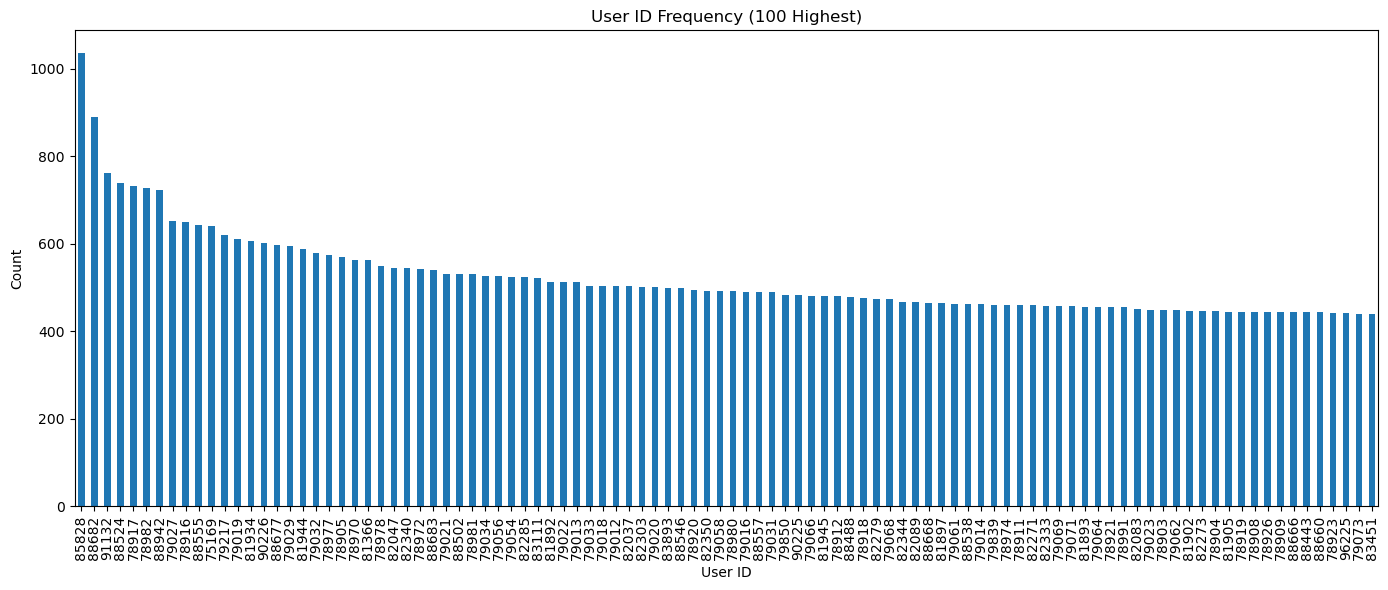

In [96]:
# Plot the highest frequency (counts) of user_ids 
user_counts = cleaned_df['user_id'].value_counts(ascending=False)
plt.figure(figsize=(14, 6))
user_counts.head(100).plot(kind='bar')
plt.title('User ID Frequency (100 Highest)')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

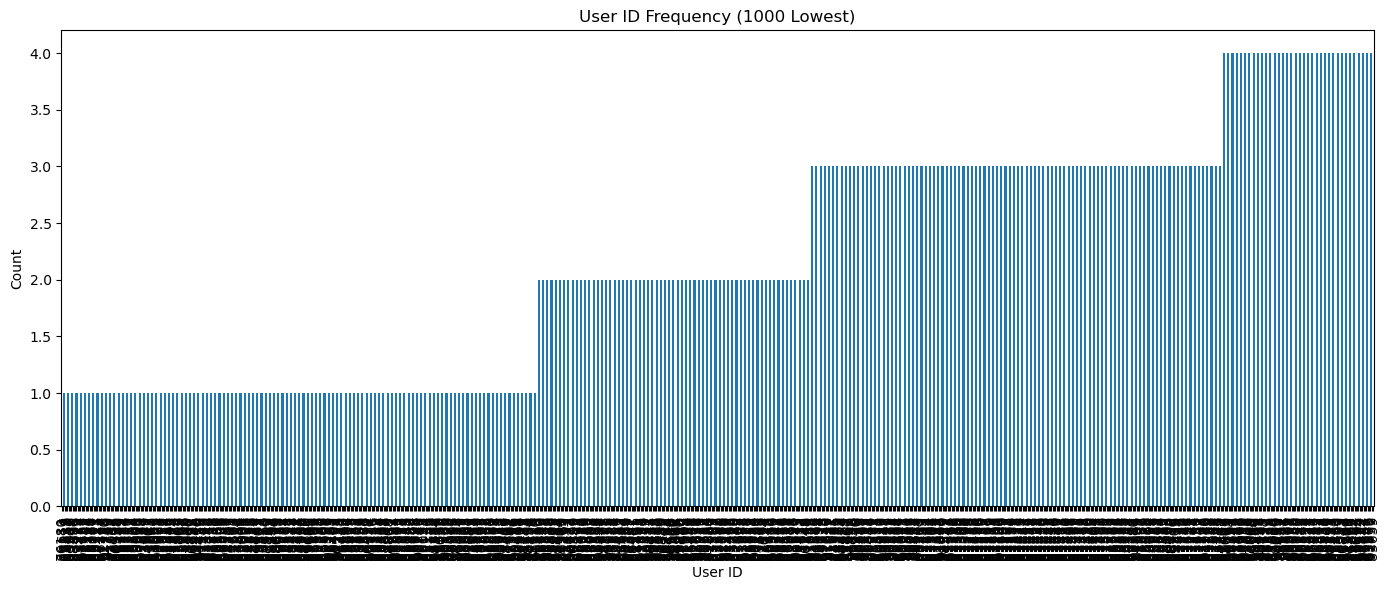

In [97]:
# Plot the lowest frequency (counts) of user_ids 
user_counts = cleaned_df['user_id'].value_counts(ascending=True)
plt.figure(figsize=(14, 6))
user_counts.head(1000).plot(kind='bar')
plt.title('User ID Frequency (1000 Lowest)')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

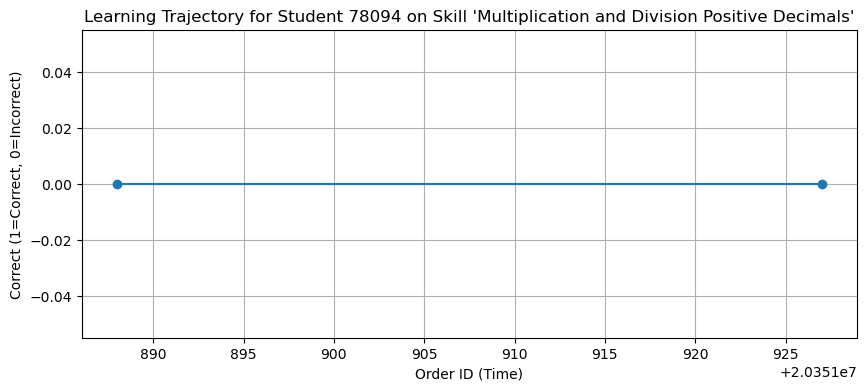

In [123]:
# Plot the learning trajectory for a specific student and skill

student_id = cleaned_df['user_id'].iloc[2000]  # pick a student, or set manually
skill = 'Multiplication and Division Positive Decimals'  # pick a skill, or set manually

# Filter for this student and skill
student_skill_df = skills_exploded[
    (skills_exploded['user_id'] == student_id) &
    (skills_exploded['skill_name_split'] == skill)
].sort_values('order_id')

plt.figure(figsize=(10, 4))
plt.plot(student_skill_df['order_id'], student_skill_df['correct'], marker='o')
plt.title(f"Learning Trajectory for Student {student_id} on Skill '{skill}'")
plt.xlabel('Order ID (Time)')
plt.ylabel('Correct (1=Correct, 0=Incorrect)')
plt.grid(True)
plt.show()

Remove user_ids with less than 10 samples - we cannot use it for student LSTM agent since it doesn't have enough sequence

In [164]:
# Remove user_ids with fewer samples
user_counts = cleaned_df['user_id'].value_counts()
valid_users = user_counts[user_counts >= 10].index
cleaned_df = cleaned_df[cleaned_df['user_id'].isin(valid_users)].reset_index(drop=True)
print(f"Shape after removing user_ids with 10 or fewer samples: {cleaned_df.shape}")
print(f"Number of unique user_ids remaining: {cleaned_df['user_id'].nunique()}")

Shape after removing user_ids with 10 or fewer samples: (549049, 10)
Number of unique user_ids remaining: 6242


In [114]:
import numpy as np

user_counts = cleaned_df['user_id'].value_counts()
print(user_counts.describe()) 
print(np.percentile(user_counts, 90))

count    6242.000000
mean       87.955783
std       107.260451
min        10.000000
25%        21.000000
50%        44.000000
75%       104.750000
max      1036.000000
Name: count, dtype: float64
229.90000000000055


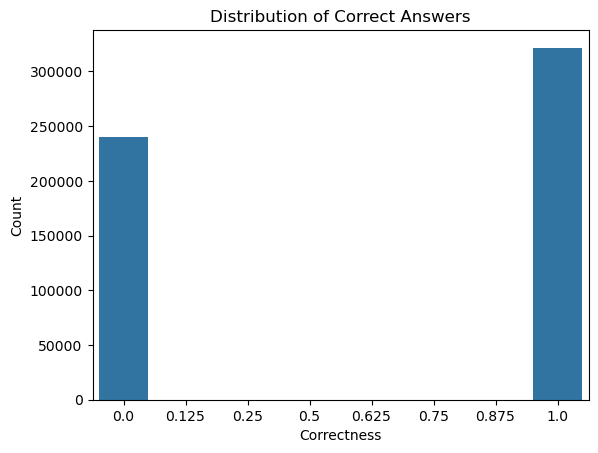

correct
1.000    0.572158
0.000    0.427538
0.250    0.000108
0.500    0.000096
0.750    0.000092
0.875    0.000004
0.625    0.000002
0.125    0.000002
Name: proportion, dtype: float64


In [115]:
# EDA on 'correct' (distribution of correct/incorrect answers)
sns.countplot(x='correct', data=df)
plt.title('Distribution of Correct Answers')
plt.xlabel('Correctness')
plt.ylabel('Count')
plt.show()
print(df['correct'].value_counts(normalize=True))

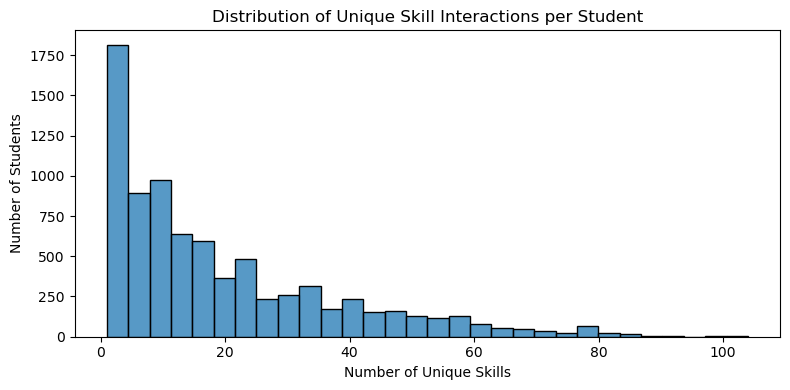

In [165]:
# Number of unique skills each student encounters (using exploded skill_name_split)
student_skill_counts = skills_exploded.groupby('user_id')['skill_name_split'].nunique()

plt.figure(figsize=(8,4))
sns.histplot(student_skill_counts, bins=30, kde=False)
plt.title('Distribution of Unique Skill Interactions per Student')
plt.xlabel('Number of Unique Skills')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

In [2]:
# Calculate the 80th percentile of interaction counts per student
student_interaction_counts = df['user_id'].value_counts()
percentile_80 = np.percentile(student_interaction_counts, 80)
print(f"80th percentile of unique student interaction counts: {percentile_80}")

NameError: name 'df' is not defined

In [116]:
# Replace 'skill_name_split' in cleaned_df with the exploded version from skills_exploded
# We'll group by the original index to aggregate back to lists

# First, ensure skills_exploded has a column with the original cleaned_df index if not already present
if 'orig_index' not in skills_exploded.columns:
    # If not present, try to align by order_id and user_id (assuming unique per row)
    merged = pd.merge(
        cleaned_df[['user_id', 'order_id']],
        skills_exploded[['user_id', 'order_id', 'skill_name_split']],
        on=['user_id', 'order_id'],
        how='left'
    )
    # Group by cleaned_df index to get all exploded skills as a list
    cleaned_df['skill_name_split'] = merged.groupby(merged.index)['skill_name_split'].apply(list)
else:
    # If orig_index is present, use it to group
    cleaned_df['skill_name_split'] = skills_exploded.groupby('orig_index')['skill_name_split'].apply(list)

print("cleaned_df['skill_name_split'] updated with exploded skills.")
cleaned_df.head()

cleaned_df['skill_name_split'] updated with exploded skills.


,user_id,order_id,correct,answer_type,attempt_count,hint_count,overlap_time,skill_name_split
0,77912,20223948,1.0,algebra,1,0,95637,[Effect of Changing Dimensions of a Shape Prop...
1,77912,20223955,1.0,choose_1,1,0,227226,[Effect of Changing Dimensions of a Shape Prop...
2,77912,20223963,1.0,choose_1,1,0,165891,[Effect of Changing Dimensions of a Shape Prop...
3,77912,20223971,1.0,choose_1,1,0,129112,[Effect of Changing Dimensions of a Shape Prop...
4,77912,20223984,1.0,choose_1,1,0,87127,[Addition Whole Numbers]


In [117]:
# Drop 'skill_name' and 'sequence_id' columns from cleaned_df
cleaned_df = cleaned_df.drop(columns=['skill_name', 'sequence_id'])
print("Columns after dropping 'skill_name' and 'sequence_id':", cleaned_df.columns.tolist())
cleaned_df.head()

KeyError: "['skill_name', 'sequence_id'] not found in axis"

In [128]:
cleaned_df.to_csv('data/cleaned_df.csv', index=False)
print("cleaned_df saved to data/cleaned_df.csv")

cleaned_df saved to data/cleaned_df.csv
